# FUNDAMENTALS_26. 활성화 함수의 이해

# 활성화 함수
  - softmax, ReLU, sigmoid, tanh 등 이미 익숙하게 들어보았을 활성화 함수(activation function)이 있다.
  - 활성화 함수가 무엇이고 어떤 종류가 있는지 알아본다.

### 활성화 함수란?

  - 활성화란 특정 행동을 했을 때, 특정 조건이 만족되면 활성화 되는 것을 의미한다.
  - 우리가 지금까지 써왔던 신경망 속의 퍼셉트론(perceptron) 혹은 노드(node)도 특정 조건이 만족되면 활성화 되도록 디자인 되어 있다.
  - 예를 들어 ReLU는 입력값이 0 미만이라는 조건을 만족하면 0을 출력하고 입력값이 0 이상이면 입력값 그대로를 출력하도록 디자인 되어 있다.
  - sigmoid 함수의 경우 입력값이 - 무한대로 갈수록 0을 출력하고 0일때는 1/2를 출력하고 0 이상일때는 1을 출력한다. 즉 0 이상일 때 활성화 되고 0보다 작으면 비활성화 된다.

### 활성화 함수를 사용하는 이유는?
  - 활성화 함수를 사용함으로서 모델의 표현력이 향상된다.
  - 딥러닝 모델은 기본적으로 선형 관계를 가지고 있는데 비선형 데이터들을 표현하기 위해서는 선형이 아닌 비선형성을 지닐 수 있어야 한다.
  - 이때 쓰이는 것이 활성화 함수이고 이 활성화 함수를 layer 사이에 넣어줌으로써 모델이 비선형 데이터도 표현할 수 있게 된다.

### 퍼셉트론
  - 활성화 함수를 이해하기 위해선 먼저 퍼셉트론에 대해서 알아야 한다.
  - 우리가 알고 있는 딥러닝 모델을 보통 여러개의 층으로 이루어져 있다.
  - 그것을 하나의 층으로 쪼갠다면 보통 '노드'라고 불리는데 이것을 퍼셉트론(perceptron)이라고 한다.
  - 이 퍼셉트론을 쌓으면 단층 퍼셉트론이 되고 단층 퍼셉트론을 쌓으면 다층 퍼셉트론이 된다.

### 퍼셉트론에서의 활성화 함수의 역할
  - 활성화 함수는 퍼셉트론에서 들어온 신호들로부터 자신의 출력신호를 만들고 그 출력신호를 전송하는 역활을 한다.
  - 이 때 출력 신호는 단순히 입력 신호들의 합이 아닌 비선형 방식으로 결정된다.
  - 또 들어온 신호가 특정 임계점을 넘으면 출력을 하고 넘지 못하면 무시한다.
  - 이렇게 신호를 전달해주기 때문에 transfer function 이라고도 알려져 있다.
  - 활성화 함수는 그 표현에 따라서 선형 활성화 함수 / 비선형 활성화 함수로 나뉜다.

## 선형과 비선형

### 선형(Linear)
  - 선형 변환이란 '선형'이라는 규칙을 지키며 V 공간상의 벡터를 W 공간상의 벡터로 바꿔주는 역할을 한다.
  - 참고영상 : https://youtu.be/kYB8IZa5AuE

### 비선형(Non- Liear)
  - 비선형은 선형이 아닌 함수를 의미한다.
  - 비선형 활성화 함수를 사용하는 가장 큰 이유는 모델의 표현력 향상이다.
  - 그렇다면 선형 활성화 함수를 사용하면 왜 표현력이 떨어지는 것일까?
  - 레이어를 충분히 쌓는다면 선형 활성화 함수를 사용해도 모델의 표현력을 향상시킬 수 있지 않을까?
  - 하지만 선형 활성화 함수를 사용해서 노드의 개수를 아무리 많이 붙여도 결국 하나의 노드를 사용하는 것과 차이가 없다.

## 활성화 함수의 종류 첫번째 - 이진 계단 함수
  - 이진 계단 함수(Binary step function)은 들어온 입력이 특정 임계점을 넘으면 1(혹은 true)를 출력하고 그렇지 않으면 0을 출력한다.
 

In [1]:
# 사용하는 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


In [2]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해주세요
    return 0 if x<threshold else 1

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

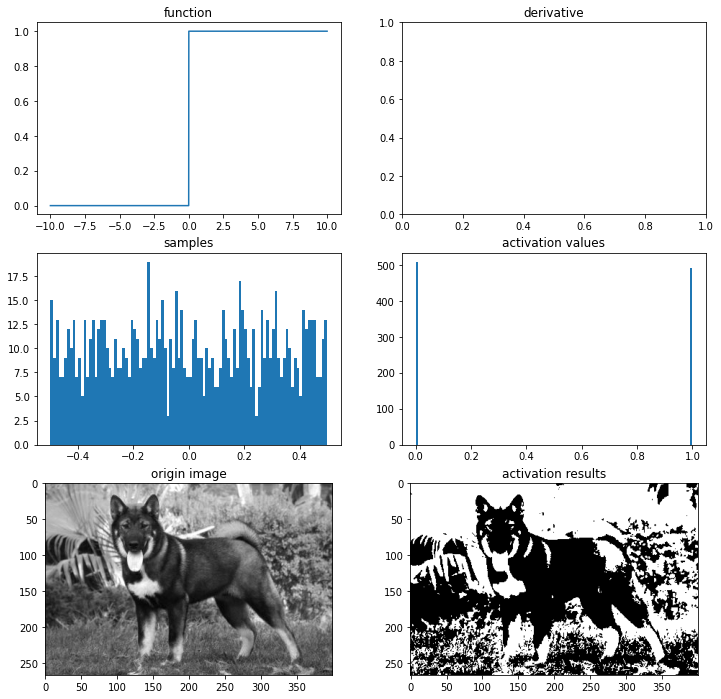

In [4]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

  - 이진 계단 함수의 치역(range)은 0과 1만 나온다.

In [5]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [6]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

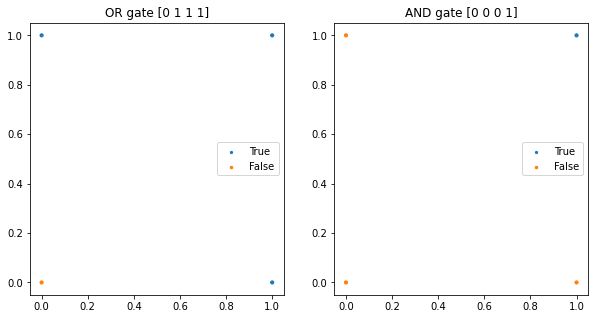

In [7]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

  - 이진 계단 함수는 선형적으로 구분 가능한 문제 (예를 들면 AND gate, OR gate)를 구현할 수 있다.
  - 즉 하나의 선으로 구분할 수 있는 문제를 해결 할 수 있다.

In [10]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.00524233, 0.01286786]), array([-0.00411659]))
999th epoch, accuracy : 1.0
(array([0.02259238, 0.29485015]), array([-0.31115052]))


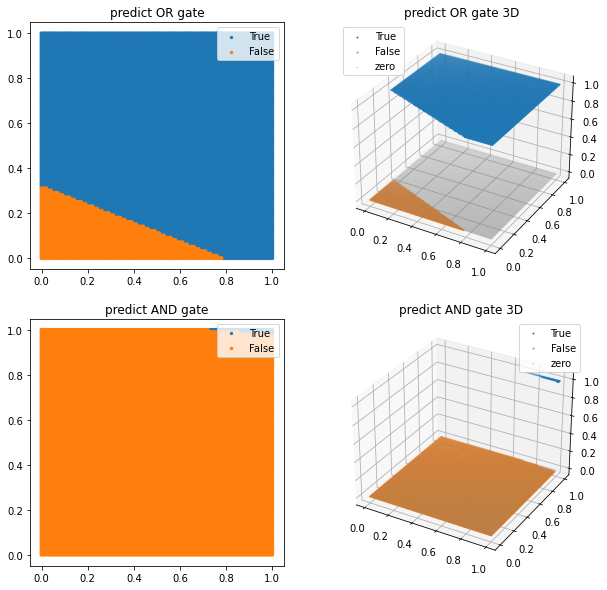

In [11]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

### 이진 계단 함수의 한계
  - 이진 계단 함수의 한계는 하나의 선으로 구분할 수 없는 문제는 해결할 수 없다는 것이다.
  - 이진 계단 함수가 가진 다른 한계는 역전파 알고리즘을 사용할 수 없다.
  - 이진 계단 함수는 다중 출력을 할 수 없기 때문에 다양한 클래스를 구분해야 하는 문제를 해결 할 수 없다.

## 활성화 함수의 종류 두번째 - 선형 활성화 함수
  - 선형 활성화 함수(linear activation function)은 말 그대로 선형인 활성화 함수이다.
  - 선형 활성화 함수를 사용한 모델은 이진 계단 함수를 사용한 모델과 다르게 다중 출력이 가능하다.
  - 또한 미분이 가능해서 역전파 알고리즘 또한 사용이 가능하다.

### 선형 활성화 함수의 한계
  - 하지만 선형 활성화 함수도 이진 계단 함수와 같이 비선형적 특성을 지닌 데이터를 예측하지 못한다는 한계가 있다.

## 비선형 활성화 함수 - 시그모이드, softmax
  - 비선형 활성화 함수는 '비선형'인 활성화 함수로 앞에서 나왔던 활성화 함수들의 문제점을 해결한 함수이다.
  - 비선형 활성화 함수를 사용한 모델은 역전파 알고리즘을 사용할 수 있고 다중 출력도 가능하며 비선형적 특성을 지닌 데이터도 예측이 가능하다.

### 시그모이드 / 로지스틱
  - 시그모이드(sigmoid)함수는 로지스틱(logistic)함수라고도 불린다.
  - 시그모이드 함수의 치역(range)은 0,1 이다.
  - 그래서 시그모이드 함수는 확률을 예측해야 하는 모델에서 자주 사용된다.

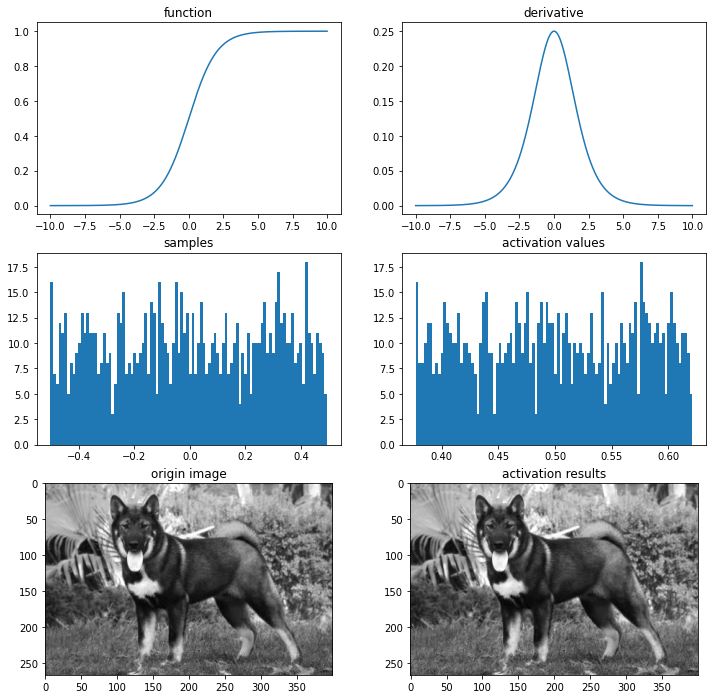

In [12]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

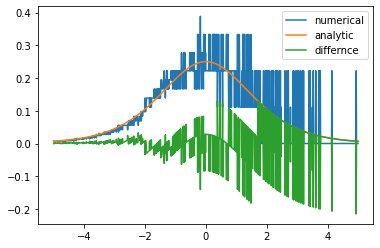

In [13]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

### 시그모이드 함수의 단점
  - 시그모이드 함수는 0 또는 1에서 포화 상태가 된다.
  - 이 말은 입력값이 아무리 커져도 함수의 출력은 1에 가까워져 갈뿐 1 이상으로 높아지지 않고 입력값이 아무리 작아도 출력은 0에 가까워질뿐 0 이하로 떨어지지 않는다.
  - 이렇게 포화상태가 되면 그래디언트가 0과 아주 가까워지게 된다.
  - 그러면 사실상 가중치 업데이트가 일어나지 않게 되고 이것을 그래디언트를 죽인다라고 표현한다.
  - 그래디언트가 죽은 상태가 되면 아무리 많은 에포크를 돌려도 훈련이 되지 않는다.
  - 두번째 단점으로는 시그모이드 함수의 출력은 0이 중심이 아니라는 것이다.
  - 이 말은 훈련의 시간이 오래 걸리게 된다는 것이다.
  - 최근에는 이러한 단점들 때문에 시그모이드 함수를 잘 사용하지 않게 되었다.

### softmax
  - 소프트맥스 함수는 class의 수에 제한 없이 각 class의 확률을 구할 때 사용된다.
  - 소프트맥스의 가장 큰 특징은 확률의 성질인 모든 경우의 수의 확률을 더하면 1이 되는 성질을 가지고 있다.
  - 예를 들면 가위 바위 보 사진 분류 문제를 풀 때 소프트맥스는 각 class의 확률값을 (0.2, 0.5, 0.3) 이런식으로 출력값을 준다.

## 비선형 활성화 함수 - 하이퍼볼릭 탄젠트(tanh)
  - 하이퍼볼릭 탄젠트 함수는 쌍곡선 함수 중 하나이다.
  - 하이퍼볼릭 탄젠트 함수의 치역(range)는 (-1, 1)이다.
  - 시그모이드 함수가 0이 중심이 아니었던 것과 다르게 하이퍼볼릭 탄젠트 함수는 0을 중심으로 하고 있다.
  - 그렇기 때문에 시그모이드 함수보다 더 빨리 훈련이 가능한다.

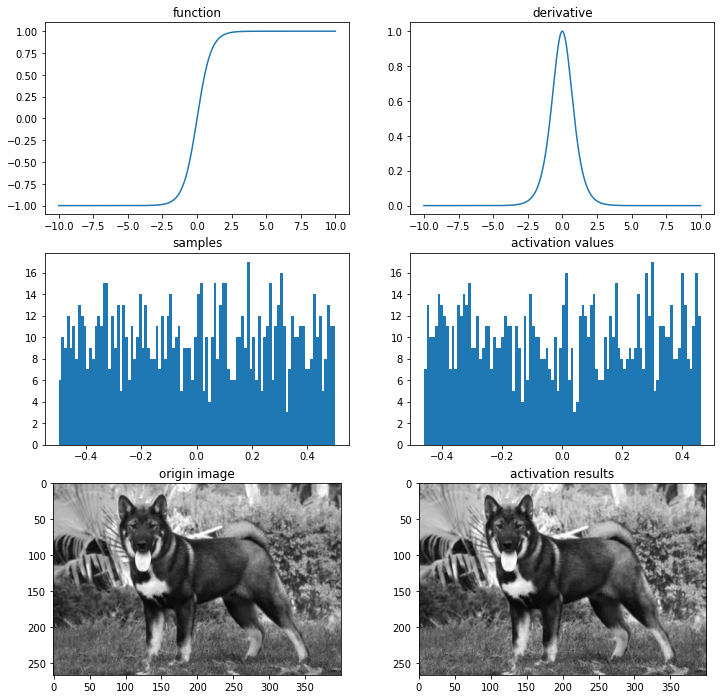

In [14]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

## 비선형 활성화 함수 - ReLU
  - ReLU 함수는 최근 가장 많이 사용되고 있는 활성화 함수이다.
  - ReLU 함수의 치역(range)는 (0 , 무한대)이다.
  - ReLU를 사용한 모델은 하이퍼볼릭 탄젠트를 사용한 모델보다 몇 배 더 빠르게 훈련할 수 있다.

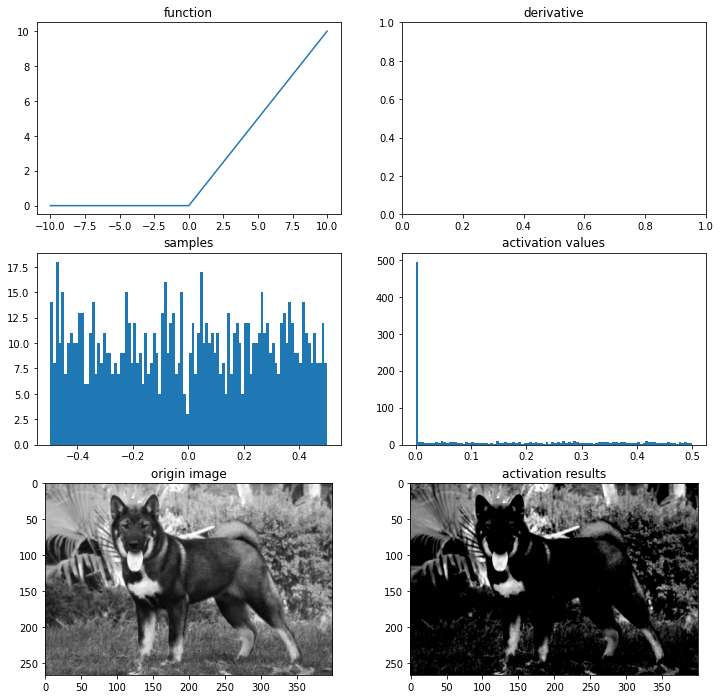

In [15]:
# ReLU의 기본 식

import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

### ReLU 함수의 단점
  - ReLU 함수는 학습률(learning rate)를 크게 잡았을 경우 노드의 출력값과 그래디언트가 0이 되어 노드가 죽어버리는 문제가 생긴다.
  - 이러한 문제를 Dying ReLU라고 부른다.
  - 하지만 학습률을 줄여준다면 이 문제는 적게 발생한다.

### ReLU 함수의 단점을 극복하기 위한 방법

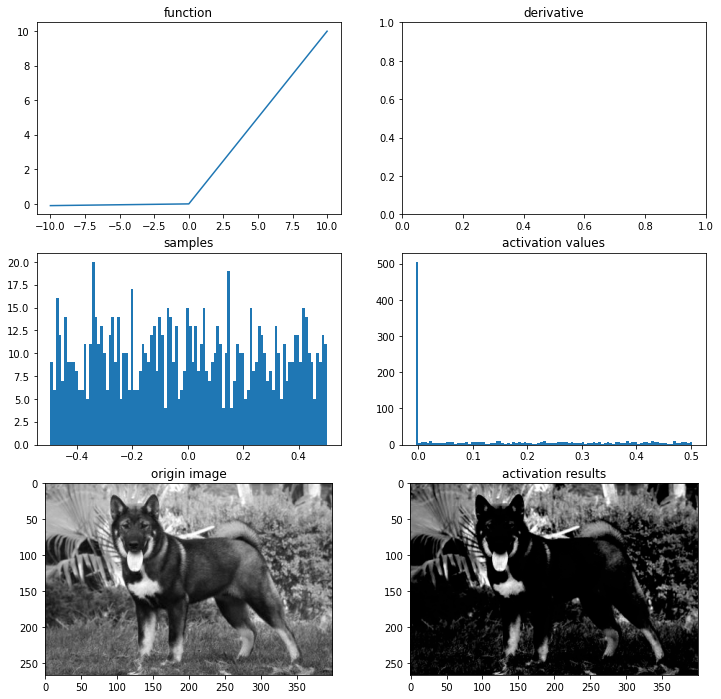

In [16]:
# Leaky ReLU
# 이 방법은 Dying ReLU를 발생시켰던 0을 출력하는 부분을 아주 작은 음수값으로 출력하게 만들어 주어 문제를 해결한다.

import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

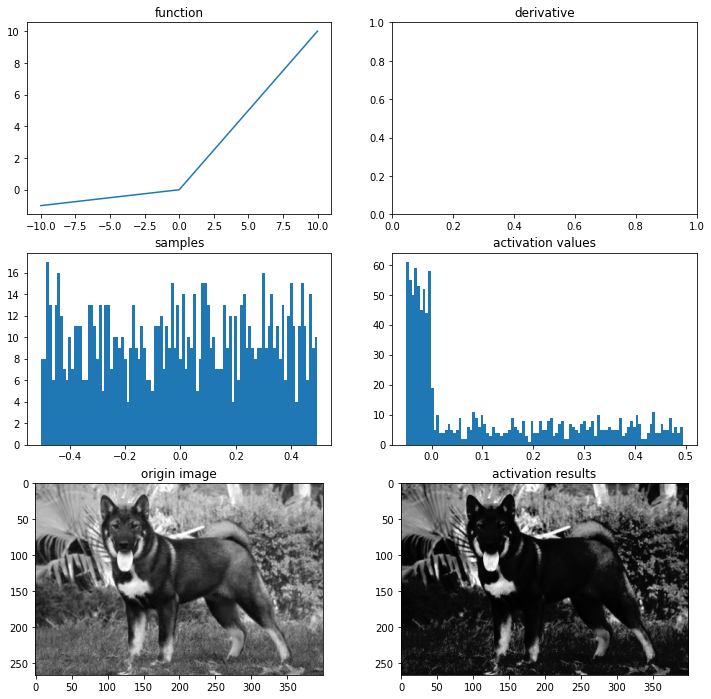

In [17]:
# PReLU
# 이 방법은 Leaky ReLU와 비슷하지만 새로운 파라미터를 추가하여 0 미만일 때의 기울기가 훈련되도록 설계되었다.

# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

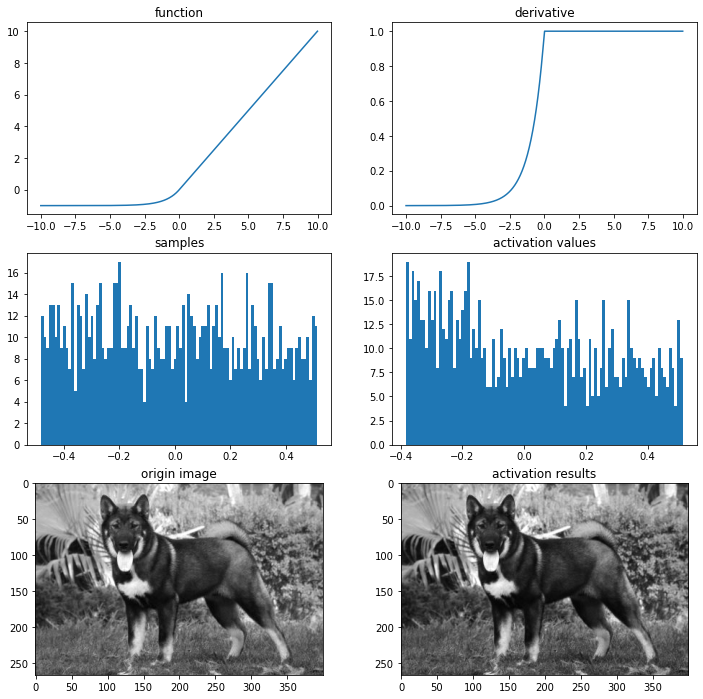

In [18]:
# ELU
# 이 방법은 ReLU의 모든 장점을 포함하며 0이 중심점이 아니었던 단점과 Dying ReLU 문제를 해결한 방법이다.

# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()